<a href="https://colab.research.google.com/github/Frankoceans11/GSB-521/blob/main/GSB521_Group_Project_(USE_THIS_COPY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis

From Professor Pierce's analysis, we can see that the majority of households earning over $200k were Democratic districts.

Hypothesis: We believe that householders in the age group of 44-64 make more than householders in the 25 and under and 25-44 age groups.
Of those age groups we believe that householders in the Democratic party tend to make more than those in the Republican party. Lastly, we believe the Householders that make less than 10k will have a more even distribution.

This type of analysis could aid those in higher levels of government by helping them to target certain age groups at different levels of income. 

# Links to explain the meaning of householder.

In [ ]:
#https://www.census.gov/programs-surveys/cps/technical-documentation/subject-definitions.html#:~:text=is%20not%20related.-,Householder,%2C%20boarders%2C%20or%20paid%20employees.
#https://www2.census.gov/programs-surveys/acs/tech_docs/user_notes/Family_Equalization_2006.pdf


# We begin by importing our libraries and the ACS Household data. 

In [ ]:
# first some initial setup of libraries we will be using
import pandas as pd # this is the main library used in python for manipulating data. 
import json # this is a library to parse json (javascript object notation)
from urllib.request import urlopen # library to read data from a URL
import matplotlib.pyplot as plt # visualization library we will use that integrates with pandas
import numpy as np


# Importing ACS Housholder data 

#Householders over 200k

In [ ]:
# We are reading in the data we want from ACS 2021. The API returns json data. Try copy and pasting the link yourself in a browser to see what the raw data looks like.
url2 = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001_001E,B19037_018E,B19037_035E,B19037_052E&for=congressional%20district:*&in=state:*"
#"https://api.census.gov/data/2021/acs/acs1?get=NAME,B19037_001E,B19037_002E,B19037_019E,B19037_036E&for=congressional%20district:*&in=state:*"

response2 = urlopen(url2)

data_json2 = json.loads(response2.read())
data_json2.pop(0)


In [ ]:
cols2 =  ['District Name','Total Households','Householder under 25 more than 200k','Householder 25 to 44 more than 200k','Householder 44 to 65 more than 200k','State code','district number']

acs_df2 = pd.DataFrame(data_json2,columns=cols2)

acs_df2[['District', 'State']] = acs_df2['District Name'].str.split(',', expand=True)
acs_df2['district number'] = pd.to_numeric(acs_df2['district number'])

acs_df2['State'] = acs_df2['State'].str.strip() # Strips the white space


# Keeping the columns we need
acs_df2 = acs_df2[['Total Households','Householder under 25 more than 200k','Householder 25 to 44 more than 200k','Householder 44 to 65 more than 200k','State','district number']]

# Looking at the top 5 of our data
acs_df2.head()  


,Total Households,Householder under 25 more than 200k,Householder 25 to 44 more than 200k,Householder 44 to 65 more than 200k,State,district number
0,289474,61,4855,12155,Michigan,10
1,299804,0,3220,6059,Mississippi,4
2,278057,68,6094,9511,Michigan,14
3,306685,0,2308,6188,Michigan,1
4,285554,20,3302,5792,Mississippi,3


In [ ]:
# Converting data into numeric.
acs_df2["Total Households"] = pd.to_numeric(acs_df2["Total Households"])
acs_df2["Householder under 25 more than 200k"] = pd.to_numeric(acs_df2["Householder under 25 more than 200k"])
acs_df2["Householder 25 to 44 more than 200k"] = pd.to_numeric(acs_df2["Householder 25 to 44 more than 200k"])
acs_df2["Householder 44 to 65 more than 200k"] = pd.to_numeric(acs_df2["Householder 44 to 65 more than 200k"])

# Compute some new columns based on the existing columns for later visualization
acs_df2[' % of Householder under 25 more than 200k'] = (100*acs_df2['Householder under 25 more than 200k'])/acs_df2['Total Households']
acs_df2['% of Householder 25 to 44 more than 200k'] = (100*acs_df2['Householder 25 to 44 more than 200k'])/acs_df2['Total Households']
acs_df2['% of Householder 44 to 65 more than 200k'] = (100*acs_df2['Householder 44 to 65 more than 200k'])/acs_df2['Total Households']

# Sanity checking data 
acs_df2.head()


,Total Households,Householder under 25 more than 200k,Householder 25 to 44 more than 200k,Householder 44 to 65 more than 200k,State,district number,% of Householder under 25 more than 200k,% of Householder 25 to 44 more than 200k,% of Householder 44 to 65 more than 200k
0,289474,61,4855,12155,Michigan,10,0.021073,1.677180,4.198995
1,299804,0,3220,6059,Mississippi,4,0.000000,1.074035,2.020987
2,278057,68,6094,9511,Michigan,14,0.024455,2.191637,3.420522
3,306685,0,2308,6188,Michigan,1,0.000000,0.752564,2.017705
4,285554,20,3302,5792,Mississippi,3,0.007004,1.156349,2.028338


# Householder under 10k

In [ ]:
URL = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001_001E,B19037_003E,B19037_020E,B19037_037E&for=congressional%20district:*&in=state:*"

response4 = urlopen(URL)

data_json4 = json.loads(response4.read())
data_json4.pop(0)


['NAME',
 'B19001_001E',
 'B19037_003E',
 'B19037_020E',
 'B19037_037E',
 'state',
 'congressional district']

In [ ]:
cols4 =  ['District Name','Total Households','Householder under 25 less than 10k','Householder 25 to 44 less than 10k','Householder 44 to 65 less than 10k','State code','district number']

acs_df4 = pd.DataFrame(data_json4,columns=cols4)

acs_df4[['District', 'State']] = acs_df4['District Name'].str.split(',', expand=True)
acs_df4['district number'] = pd.to_numeric(acs_df4['district number'])

acs_df4['State'] = acs_df4['State'].str.strip() # Strips the white space


# Keeping the columns we need
acs_df4 = acs_df4[['Total Households','Householder under 25 less than 10k','Householder 25 to 44 less than 10k','Householder 44 to 65 less than 10k','State','district number']]

# Looking at the top 5 of our data
acs_df4.head()  


,Total Households,Householder under 25 less than 10k,Householder 25 to 44 less than 10k,Householder 44 to 65 less than 10k,State,district number
0,289474,379,2935,5949,Michigan,10
1,299804,834,6824,11033,Mississippi,4
2,278057,793,8025,11115,Michigan,14
3,306685,1218,3735,7634,Michigan,1
4,285554,2854,9018,7847,Mississippi,3


In [ ]:
# Converting data into numeric.
acs_df4["Total Households"] = pd.to_numeric(acs_df4["Total Households"])
acs_df4["Householder under 25 less than 10k"] = pd.to_numeric(acs_df4["Householder under 25 less than 10k"])
acs_df4["Householder 25 to 44 less than 10k"] = pd.to_numeric(acs_df4["Householder 25 to 44 less than 10k"])
acs_df4["Householder 44 to 65 less than 10k"] = pd.to_numeric(acs_df4["Householder 44 to 65 less than 10k"])

# Compute some new columns based on the existing columns for later visualization
acs_df4[' % of Householder under 25 less than 10k'] = (100*acs_df4['Householder under 25 less than 10k'])/acs_df4['Total Households']
acs_df4['% of Householder 25 to 44 less than 10k'] = (100*acs_df4['Householder 25 to 44 less than 10k'])/acs_df4['Total Households']
acs_df4['% of Householder 44 to 65 less than 10k'] = (100*acs_df4['Householder 44 to 65 less than 10k'])/acs_df4['Total Households']

# Sanity checking data 
acs_df4.head()

,Total Households,Householder under 25 less than 10k,Householder 25 to 44 less than 10k,Householder 44 to 65 less than 10k,State,district number,% of Householder under 25 less than 10k,% of Householder 25 to 44 less than 10k,% of Householder 44 to 65 less than 10k
0,289474,379,2935,5949,Michigan,10,0.130927,1.013908,2.055107
1,299804,834,6824,11033,Mississippi,4,0.278182,2.276154,3.680071
2,278057,793,8025,11115,Michigan,14,0.285193,2.886099,3.997382
3,306685,1218,3735,7634,Michigan,1,0.397150,1.217862,2.489199
4,285554,2854,9018,7847,Mississippi,3,0.999461,3.158072,2.747992


#Importing Congressional data

In [ ]:
# read from the congressional data and put into a pandas dataframe
party_df = pd.read_csv("http://goodcsv.com/wp-content/uploads/2020/08/us-house-of-representatives-2020.csv", encoding = "ISO-8859-1")

# extract the district number from the data (it was in the format of 5th and we want that to just be 5) using a regular expression.
party_df['district number'] = party_df['District/Position'].str.extract('(\d+)')
party_df['district number'] = party_df['district number'].fillna(0)
party_df['district number'] = pd.to_numeric(party_df['district number'])
party_df['State'] = party_df['State/Territory']
party_df['State'] = party_df['State'].str.strip()
party_df['Party'] = party_df['Party'].str.strip() # remove extraneous whitespace

# Let's just keep the columns we need
party_df = party_df[['State', 'Party', "district number"]]

party_df.head(5)

#Check if each dataset is correct

In [ ]:
party_df['State'].value_counts()

In [ ]:
acs_df4['State'].value_counts()

In [ ]:
acs_df2['State'].value_counts()

There are 435 total rows, which matches up with the number of congress members in the 116th congress. 

#Merging the datasets

In [ ]:
from pandas.core.reshape.merge import merge
# merged_df = pd.merge(acs_df, party_df, on=["State", "district number"])

merge2 = merge(acs_df2,party_df)
merge3 = merge(merge2,acs_df4)


# Checking  if datasets merged correctly

In [ ]:
#merge2.describe()
merge3.head()

,Total Households,Householder under 25 more than 200k,Householder 25 to 44 more than 200k,Householder 44 to 65 more than 200k,State,district number,% of Householder under 25 more than 200k,% of Householder 25 to 44 more than 200k,% of Householder 44 to 65 more than 200k,Party,Householder under 25 less than 10k,Householder 25 to 44 less than 10k,Householder 44 to 65 less than 10k,% of Householder under 25 less than 10k,% of Householder 25 to 44 less than 10k,% of Householder 44 to 65 less than 10k
0,289474,61,4855,12155,Michigan,10,0.021073,1.677180,4.198995,R,379,2935,5949,0.130927,1.013908,2.055107
1,299804,0,3220,6059,Mississippi,4,0.000000,1.074035,2.020987,R,834,6824,11033,0.278182,2.276154,3.680071
2,278057,68,6094,9511,Michigan,14,0.024455,2.191637,3.420522,D,793,8025,11115,0.285193,2.886099,3.997382
3,306685,0,2308,6188,Michigan,1,0.000000,0.752564,2.017705,R,1218,3735,7634,0.397150,1.217862,2.489199
4,285554,20,3302,5792,Mississippi,3,0.007004,1.156349,2.028338,R,2854,9018,7847,0.999461,3.158072,2.747992


# Visualizations to test our hypothesis.





We've decided to remove Libertarians.

In [ ]:
R = merge3[merge3['Party'].str.contains('R')]["Total Households"].values.tolist()
D = merge3[merge3['Party'].str.contains('D')]["Total Households"].values.tolist()
L = merge3[merge3['Party'].str.contains('L')]["Total Households"].values.tolist()

agegroup = ['Householder under 25 more than 200k','Householder 25 to 44 more than 200k','Householder 44 to 65 more than 200k']


In [ ]:
under_25 = merge3.groupby('Party')[' % of Householder under 25 more than 200k'].median()
between_25_to_44 = merge3.groupby('Party')['% of Householder 25 to 44 more than 200k'].median()
between_44_to_65 = merge3.groupby('Party')['% of Householder 44 to 65 more than 200k'].median()

republican = [under_25['R'], between_25_to_44['R'], between_44_to_65['R']]
democrat = [under_25['D'], between_25_to_44['D'], between_44_to_65['D']]

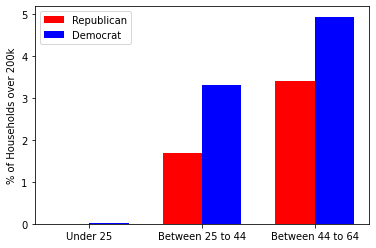

In [ ]:
width = 0.35
age_groups = ['Under 25', 'Between 25 to 44', 'Between 44 to 64']
x = np.arange(len(age_groups))

fig, ax = plt.subplots()

bar1 = ax.bar(x - width / 2, republican, width, label = 'Republican', color='red')
bar2 = ax.bar(x + width / 2, democrat, width, label = 'Democrat', color='blue')


ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.legend()

ax.set_ylabel('% of Households over 200k')

plt.show()

In [ ]:
R = merge3[merge3['Party'].str.contains('R')]["Total Households"].values.tolist()
D = merge3[merge3['Party'].str.contains('D')]["Total Households"].values.tolist()
L = merge3[merge3['Party'].str.contains('L')]["Total Households"].values.tolist()

agegroup2 = ['Householder under 25 less than 10k','Householder 25 to 44 less than 10k','Householder 44 to 65 less than 10k']


In [ ]:
under_25 = merge3.groupby('Party')[' % of Householder under 25 less than 10k'].median()
between_25_to_44 = merge3.groupby('Party')['% of Householder 25 to 44 less than 10k'].median()
between_44_to_65 = merge3.groupby('Party')['% of Householder 44 to 65 less than 10k'].median()

republican = [under_25['R'], between_25_to_44['R'], between_44_to_65['R']]
democrat = [under_25['D'], between_25_to_44['D'], between_44_to_65['D']]

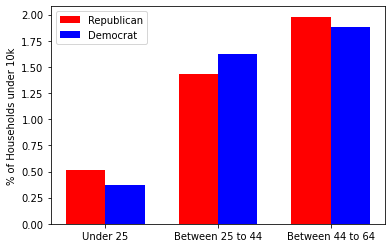

In [ ]:
width = 0.35
age_groups = ['Under 25', 'Between 25 to 44', 'Between 44 to 64']
x = np.arange(len(age_groups))

fig, ax = plt.subplots()

bar1 = ax.bar(x - width / 2, republican, width, label = 'Republican', color='red')
bar2 = ax.bar(x + width / 2, democrat, width, label = 'Democrat', color='blue')


ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.legend()

ax.set_ylabel('% of Households under 10k')

plt.show()

Conclusion: Based on our analysis, we found that there tend to be more householders that make over 200k in the Democratic party when compared to the Repulican party. Our analysis also confirmed that the age group 44-64 had more householders who earned over 200k when compared to the other age groups. 
Lastly, we found that there tends to be a more even spread when we compared the Democratic and Republican parties that have householders who make less than 10k. 